In [1]:
import torch
from torch import nn
import circuits as ckt
import learn as lrn
from models import Solver
from inputs import Input

AttributeError: module 'circuits' has no attribute 'Input'

In [ ]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)

Using cpu device


# Generate Input Data for a Simple Circuit
Circuit is an independent voltage source and a resistor.

Circuit with 2 nodes and 2 elements
[0, 1]
[(1 , 0), (1 , 0)]
[(1, {}), (0, {})]
[(1, 0, 0, {'kind': <Kinds.IVS: 0>, 'i': -10, 'v': None, 'attr': 1}), (1, 0, 1, {'kind': <Kinds.R: 2>, 'i': None, 'v': None, 'attr': None})]


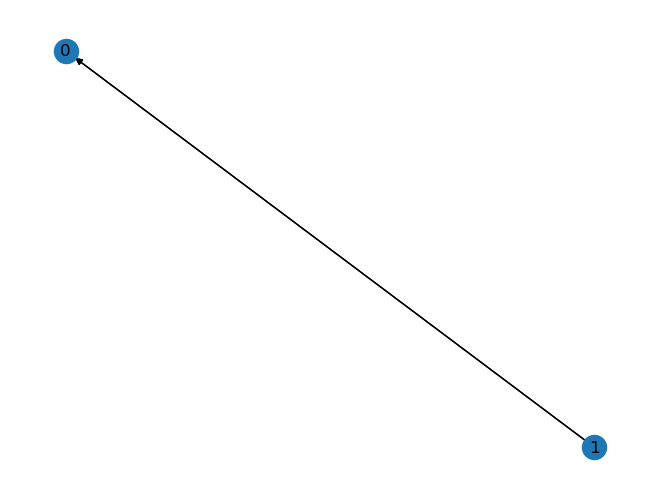

In [ ]:
vr = ckt.Circuit()

v_source = vr.add_element(kind=ckt.Kinds.IVS)
r1 = vr.add_element(kind=ckt.Kinds.R)
v_source.connect(v_source.high, r1.high)
v_source.connect(v_source.low, r1.low)
# Case 1 all resistances known
# v_source.attr = 1
# r1.attr = 1e6
# # Case 2 one resisance unknown
v_source.attr = 1
v_source.i = -10

# v_source = vr.add_element(kind=ckt.Kinds.IVS)
# r1 = vr.add_element(kind=ckt.Kinds.R)
# r2 = vr.add_element(kind=ckt.Kinds.R)
# v_source.connect(v_source.high, r1.high)
# r1.connect(r1.low, r2.high)
# v_source.connect(v_source.low, r2.low)
# # Case 1 all resistances known
# v_source.attr = 1
# r1.attr = 1e6
# r2.attr = 1e6
# # Case 2 one resisance unknown
# v_source.attr = 1
# r1.attr = 1e6
# r2.v = 0.5

print(vr)
print(vr.nodes)
print(vr.elements)
vr.draw()
print(vr.nx_graph().nodes().data())
print(vr.nx_graph().edges(data=True,keys=True))

# Create Solver

In [ ]:
import time
input = Input(vr)
start_time = time.time()
attr_param = input.init_params()
model = Solver(input=input,attr=attr_param)
X = model()
end_time = time.time()

c:\Users\terry\OneDrive\Documents\GitHub\side_circuit\ml\circuits.py:67: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M_scipy = nx.incidence_matrix(G=self.nx_graph(),oriented=True)


In [ ]:
print(f'execution time = {(end_time - start_time)*1000} ms')

execution time = 1.0082721710205078 ms


# Learn attributes

In [ ]:
num_epochs = 10000
prev_loss = 0.1

model = Solver(input=input, attr=attr_param)
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)
loss, _ = lrn.train(model,optimizer,nn.MSELoss(),None,None)
print(f'init params: {attr_param}')
print(f'init loss: {loss.item()}')

epoch = 0

while(epoch < num_epochs):

    loss, _ = lrn.train(model,optimizer,nn.MSELoss(),None,None)
    if(loss < 1e-6):
            break

    epoch += 1
    loss_change = abs(loss - prev_loss) / prev_loss
    prev_loss = loss

print(f'Done! at {epoch} passes')
print(f'solution = {model()[1]}')
print(f"attributes = {attr_param}")

init params: Parameter containing:
tensor([[1.0000],
        [0.7370]], requires_grad=True)
init loss: 1.3638261556625366
Done! at 103 passes
solution = tensor([[-10.0001],
        [ 10.0002],
        [  0.9992],
        [  0.9975],
        [ -0.9983]], grad_fn=<LinalgLstsqBackward0>)
attributes = Parameter containing:
tensor([[1.0000],
        [0.0997]], requires_grad=True)
